In [51]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from typing import *

# Import libraries for machine learning
from sklearn.model_selection import train_test_split

# Import libraries for random forest
from sklearn.ensemble import RandomForestRegressor

# Import libraries for SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Import libraries for neural networks
import tensorflow as tf
from tensorflow import keras

# Import libraries for metrics
from sklearn.metrics import mean_squared_error, r2_score

# Import libraries for plotting
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr, linregress

# Ignore warnings
warnings.simplefilter("ignore")

# Path to the training data
training_path = "./training.csv"

In [3]:
raw_df = pd.read_csv(training_path)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    29692 non-null  int64  
 1   surface_x                     29692 non-null  float64
 2   surface_y                     29692 non-null  float64
 3   bh_x                          27605 non-null  float64
 4   bh_y                          27605 non-null  float64
 5   standardized_operator_name    29692 non-null  int64  
 6   gross_perforated_length       22135 non-null  float64
 7   number_of_stages              2752 non-null   float64
 8   total_proppant                19080 non-null  float64
 9   total_fluid                   19076 non-null  float64
 10  true_vertical_depth           28197 non-null  float64
 11  ffs_frac_type                 14585 non-null  object 
 12  proppant_intensity            18971 non-null  float64
 13  f

In [8]:
raw_df = raw_df.dropna(subset=['OilPeakRate', 'surface_x', 'surface_y'])
raw_df.shape

(19306, 31)

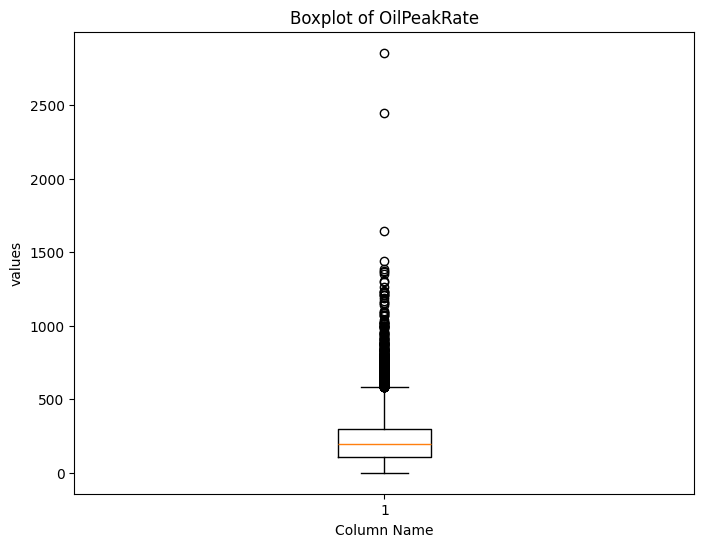

Number of outliers in OilPeakRate: 506
Value at the top whisker of OilPeakRate: 581.784971


In [19]:
# Visualize the values in the oil peak rate column
column_name = 'OilPeakRate'
plt.figure(figsize=(8, 6))

boxplot = plt.boxplot(raw_df['OilPeakRate'])

# Get the whiskers' positions
lower_whisker = boxplot['whiskers'][0].get_ydata()[1]
upper_whisker = boxplot['whiskers'][1].get_ydata()[1]

# Count the number of outliers
outliers_count = ((raw_df[column_name] < lower_whisker) | (raw_df[column_name] > upper_whisker)).sum()

plt.xlabel('Column Name')
plt.ylabel('values')
plt.title(f'Boxplot of {column_name}')

plt.show()

# Print the count of outliers
print(f'Number of outliers in {column_name}: {outliers_count}')

# Print the value at the top whisker
print(f'Value at the top whisker of {column_name}: {upper_whisker}')

In [20]:
df_oilpeakfiltered = raw_df[raw_df['OilPeakRate'] <= upper_whisker]

In [27]:
def plot_2d_heat(df, x_col, y_col, z_col):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df[x_col], df_oilpeakfiltered[y_col], c=df_oilpeakfiltered[z_col], cmap='viridis', marker='o')

    plt.colorbar(scatter, label='Oil Peak Rate')

    plt.xlabel(x_col)
    plt.ylabel(y_col)

    plt.title(z_col)
    plt.show()

In [63]:
def plot_lin_corr(df, x_col, y_col, x_lim, y_lim):

    valid_indices = np.isfinite(df[x_col]) & np.isfinite(df[y_col])
    x_clean = df[x_col][valid_indices]
    if (x_lim != -1):
        x_clean = x_clean[x_clean <= x_lim]
    y_clean = df[y_col][valid_indices]
    if (y_lim != -1):
        y_clean = y_clean[y_clean <= y_lim]
    plt.scatter(x_clean, y_clean, label='Data Points')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot of {x_col} and {y_col}')

    correlation_coefficient, p_value = pearsonr(x_clean, y_clean)
    print(f'Linear Correlation Coefficient: {correlation_coefficient}')
    print(f'P-value: {p_value}')

    plt.legend()
    plt.show()
    
    # slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)

    # residuals = y_clean - (slope * x_clean + intercept)

    # residual_threshold = 1.5

    # filtered_indices = np.abs(residuals) <= residual_threshold

    # x_filtered = x_clean[filtered_indices]
    # y_filtered = y_clean[filtered_indices]

    # plt.scatter(x_clean, y_clean, label='Data Points')
    # plt.plot(x_clean, slope * x_clean + intercept, color='red', label='Linear Regression Line')
    # plt.scatter(x_clean[~filtered_indices], y_clean[~filtered_indices], color='orange', label='Outliers')

    # plt.xlabel(x_col)
    # plt.ylabel(y_col)
    # plt.title(f'Scatter Plot of {x_col} and {y_col} with Linear Regression and Outliers')

    # plt.legend()
    # plt.show()

    

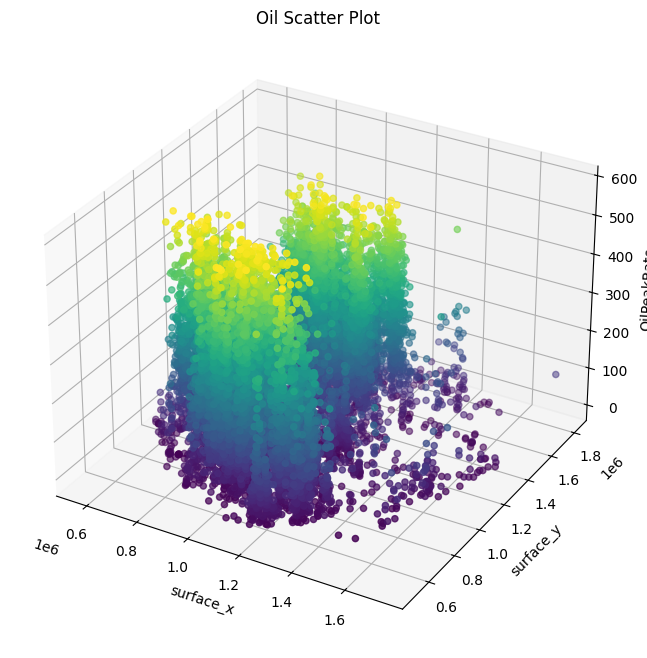

In [36]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_oilpeakfiltered['surface_x'], df_oilpeakfiltered['surface_y'], df_oilpeakfiltered['OilPeakRate'], c=df_oilpeakfiltered['OilPeakRate'], marker='o')

ax.set_xlabel('surface_x')
ax.set_ylabel('surface_y')
ax.set_zlabel('OilPeakRate')

plt.title('Oil Scatter Plot')
plt.show()

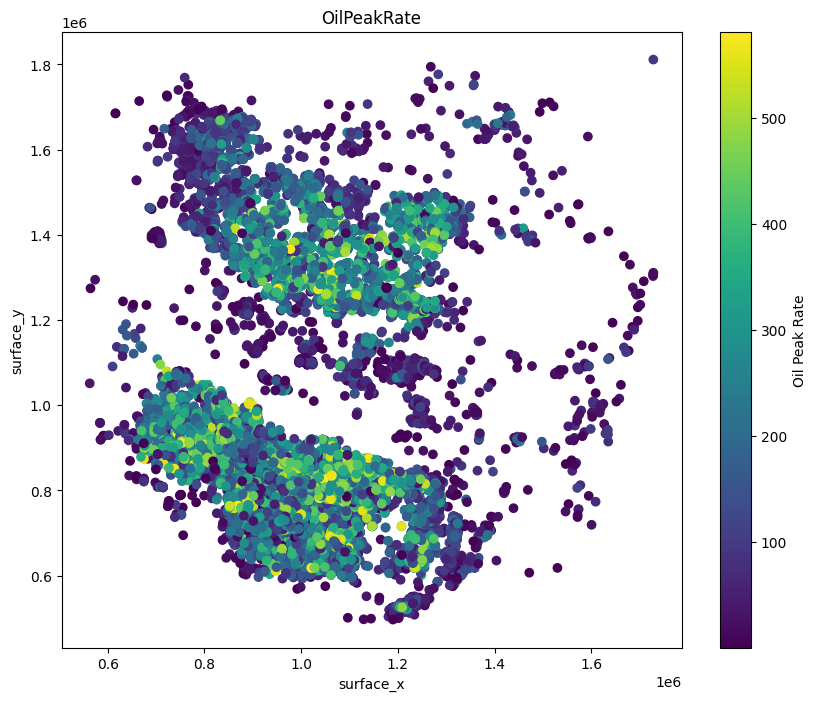

In [28]:
plot_2d_heat(df_oilpeakfiltered, 'surface_x', 'surface_y', 'OilPeakRate')

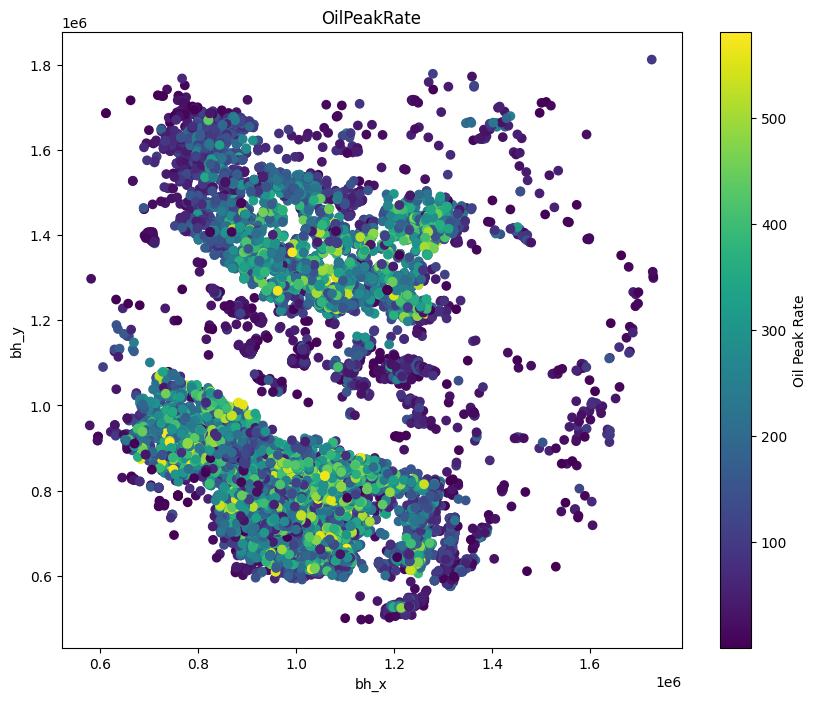

In [29]:
plot_2d_heat(df_oilpeakfiltered, 'bh_x', 'bh_y', 'OilPeakRate')

In [30]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19306 entries, 0 to 29436
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19306 non-null  int64  
 1   surface_x                     19306 non-null  float64
 2   surface_y                     19306 non-null  float64
 3   bh_x                          17882 non-null  float64
 4   bh_y                          17882 non-null  float64
 5   standardized_operator_name    19306 non-null  int64  
 6   gross_perforated_length       19148 non-null  float64
 7   number_of_stages              2643 non-null   float64
 8   total_proppant                17912 non-null  float64
 9   total_fluid                   17866 non-null  float64
 10  true_vertical_depth           19201 non-null  float64
 11  ffs_frac_type                 14310 non-null  object 
 12  proppant_intensity            17872 non-null  float64
 13  frac_f

In [31]:
def print_corr_cols(input_df, col_1, col_2):
    """
    Prints the correlation coefficient between col_1 and col_2 in input_df.
    """
    proppant_cleaned = input_df[[col_1, col_2]].dropna()
    correlation = proppant_cleaned[col_1].corr(proppant_cleaned[col_2])
    print(f"Correlation between '{col_1}' and '{col_2}': {correlation}")

In [34]:
print_corr_cols(raw_df, 'surface_x', 'bh_x')
print_corr_cols(raw_df, 'surface_y', 'bh_y')

Correlation between 'surface_x' and 'bh_x': 0.9991528546770888
Correlation between 'surface_y' and 'bh_y': 0.9999570696320421


Linear Correlation Coefficient: 0.9991528546770887
P-value: 0.0


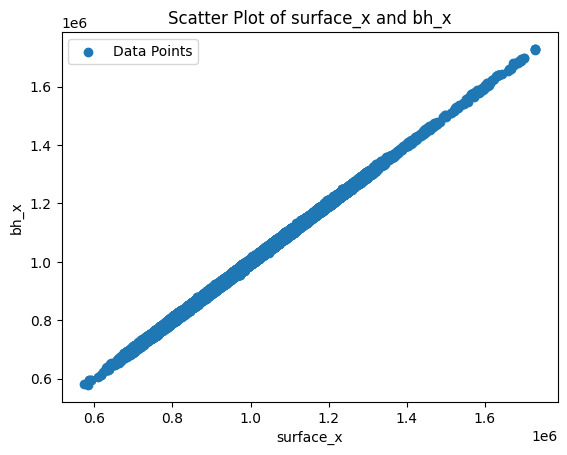

In [43]:
plot_lin_corr(raw_df, 'surface_x', 'bh_x')

Linear Correlation Coefficient: 0.9999570696320418
P-value: 0.0


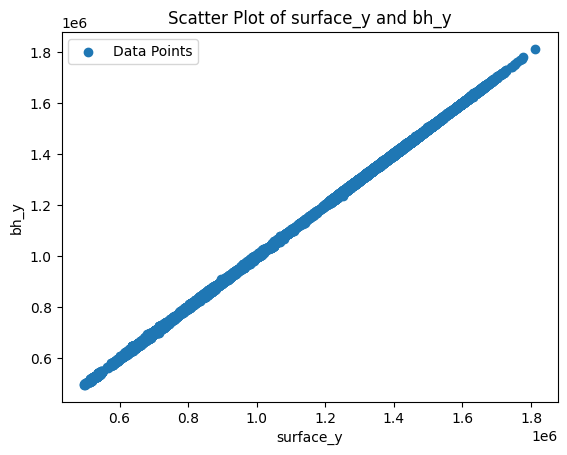

In [44]:
plot_lin_corr(raw_df, 'surface_y', 'bh_y')

In [59]:
# print(raw_df[raw_df['total_proppant'] <= 2])

       Unnamed: 0    surface_x    surface_y         bh_x         bh_y  \
17860       17860  1088439.703  1239306.527  1079248.376  1243425.217   

       standardized_operator_name  gross_perforated_length  number_of_stages  \
17860                        1272              9187.992126               NaN   

       total_proppant  total_fluid  ...  relative_well_position  \
17860             0.0   5878034.91  ...         Standalone Well   

      batch_frac_classification  well_family_relationship     frac_type  \
17860            Non-Batch Frac           Standalone Well  Primary Frac   

       frac_seasoning  horizontal_midpoint_x  horizontal_midpoint_y  \
17860            41.0             1083609.56            1241530.508   

       horizontal_toe_x  horizontal_toe_y  OilPeakRate  
17860       1079251.053       1243423.224   250.440515  

[1 rows x 31 columns]


Linear Correlation Coefficient: 0.8096710796406406
P-value: 0.0


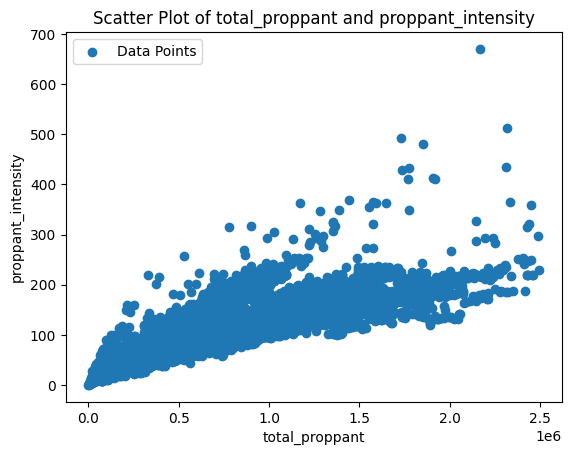

In [66]:
plot_lin_corr(raw_df, 'total_proppant', 'proppant_intensity', 20000000, 2500)

Linear Correlation Coefficient: 0.8311880577982349
P-value: 0.0


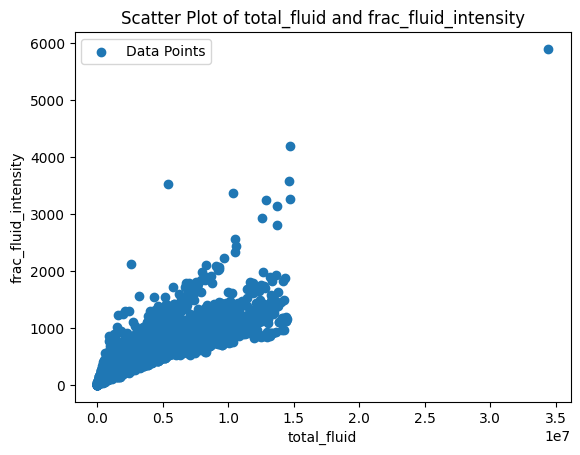

In [68]:
plot_lin_corr(raw_df, 'total_fluid', 'frac_fluid_intensity', -1, -1)

In [45]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19306 entries, 0 to 29436
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19306 non-null  int64  
 1   surface_x                     19306 non-null  float64
 2   surface_y                     19306 non-null  float64
 3   bh_x                          17882 non-null  float64
 4   bh_y                          17882 non-null  float64
 5   standardized_operator_name    19306 non-null  int64  
 6   gross_perforated_length       19148 non-null  float64
 7   number_of_stages              2643 non-null   float64
 8   total_proppant                17912 non-null  float64
 9   total_fluid                   17866 non-null  float64
 10  true_vertical_depth           19201 non-null  float64
 11  ffs_frac_type                 14310 non-null  object 
 12  proppant_intensity            17872 non-null  float64
 13  frac_f

In [47]:
new_df = pd.read_csv(training_path)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    29692 non-null  int64  
 1   surface_x                     29692 non-null  float64
 2   surface_y                     29692 non-null  float64
 3   bh_x                          27605 non-null  float64
 4   bh_y                          27605 non-null  float64
 5   standardized_operator_name    29692 non-null  int64  
 6   gross_perforated_length       22135 non-null  float64
 7   number_of_stages              2752 non-null   float64
 8   total_proppant                19080 non-null  float64
 9   total_fluid                   19076 non-null  float64
 10  true_vertical_depth           28197 non-null  float64
 11  ffs_frac_type                 14585 non-null  object 
 12  proppant_intensity            18971 non-null  float64
 13  f

In [76]:
new_df = new_df.dropna(subset=['proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio'])

new_df['is_reciprocal'] = new_df['frac_fluid_to_proppant_ratio'].eq(1 / new_df['proppant_to_frac_fluid_ratio'])
new_df['not_reciprocal'] = ~new_df['frac_fluid_to_proppant_ratio'].eq(1 / new_df['proppant_to_frac_fluid_ratio'])

In [78]:
all_recip = new_df['is_reciprocal'].all()
print(f'all vals are reciprocals: {all_recip}')

df_not_recip = new_df[new_df['not_reciprocal']][['proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio']]
print(df_not_recip)

all vals are reciprocals: False
       proppant_to_frac_fluid_ratio  frac_fluid_to_proppant_ratio
1                          0.201391                      4.965455
2                          0.176741                      5.658008
3                          0.244176                      4.095414
4                          0.181049                      5.523377
5                          0.164927                      6.063287
...                             ...                           ...
29634                      0.201289                      4.967976
29638                      0.206949                      4.832106
29647                      0.206670                      4.838634
29659                      0.206777                      4.836131
29660                      0.191860                      5.212120

[18655 rows x 2 columns]
